In [10]:
import numpy as np
import cv2
import sys

src = cv2.imread('Ch_3_Basic_img_proc/fig/lenna.bmp', 1)

if src is None:
    sys.exit()
# 그냥 더해버리면 255가 넘어감
# dst = src + 100
#이렇게 해야함
# dst = np.clip(src + 100., 0, 255).astype(np.uint8)
dst = cv2.add(src, (100, 100, 100, 0)) # BGRA 채널 각각 +100
print(dst.dtype)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

uint8


## 산술 연산

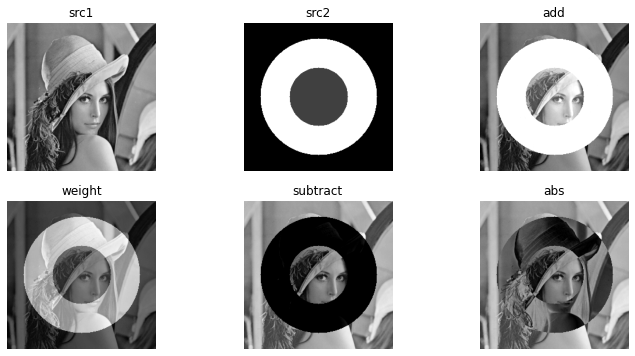

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys

src1 = cv2.imread('Ch_3_Basic_img_proc/fig/lenna256.bmp', 0)
# 재료 준비
src2 = np.zeros((256, 256), np.uint8)
cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0) # 반 반 나눔
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

# 일일이 출력
# cv2.imshow('src1', src1)
# cv2.imshow('src2', src2)
# cv2.imshow('dst1', dst1)
# cv2.imshow('dst2', dst2)
# cv2.imshow('dst3', dst3)
# cv2.imshow('dst4', dst4)

# plt 사용
plt.figure(figsize=(12, 6))
plt.subplot(231), plt.imshow(src1, cmap='gray'), plt.axis('off'), plt.title('src1')
plt.subplot(232), plt.imshow(src2, cmap='gray'), plt.axis('off'), plt.title('src2')
plt.subplot(233), plt.imshow(dst1, cmap='gray'), plt.axis('off'), plt.title('add')
plt.subplot(234), plt.imshow(dst2, cmap='gray'), plt.axis('off'), plt.title('weight')
plt.subplot(235), plt.imshow(dst3, cmap='gray'), plt.axis('off'), plt.title('subtract')
plt.subplot(236), plt.imshow(dst4, cmap='gray'), plt.axis('off'), plt.title('abs')
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

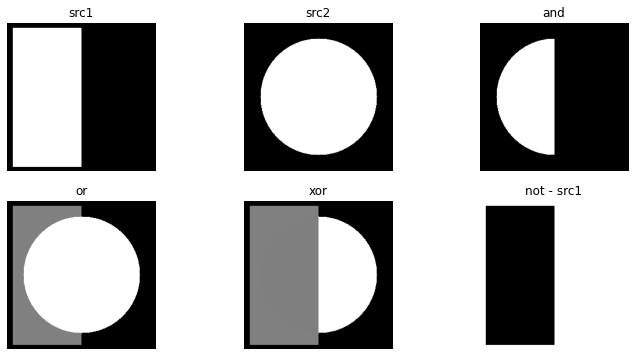

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys

src1 = np.zeros((256, 256), np.uint8)
cv2.rectangle(src1, (10, 10), (127, 248), 128, -1)
src2 = np.zeros((256, 256), np.uint8)
cv2.circle(src2, (128, 128), 100, 255, -1)

dst_bit_and = cv2.bitwise_and(src1, src2)
dst_bit_or = cv2.bitwise_or(src1, src2)
dst_bit_xor = cv2.bitwise_xor(src1, src2)
dst_bit_not = cv2.bitwise_not(src1)


plt.figure(figsize=(12, 6))
plt.subplot(231), plt.imshow(src1, cmap='gray'), plt.axis('off'), plt.title('src1')
plt.subplot(232), plt.imshow(src2, cmap='gray'), plt.axis('off'), plt.title('src2')
plt.subplot(233), plt.imshow(dst_bit_and, cmap='gray'), plt.axis('off'), plt.title('and')
plt.subplot(234), plt.imshow(dst_bit_or, cmap='gray'), plt.axis('off'), plt.title('or')
plt.subplot(235), plt.imshow(dst_bit_xor, cmap='gray'), plt.axis('off'), plt.title('xor')
plt.subplot(236), plt.imshow(dst_bit_not, cmap='gray'), plt.axis('off'), plt.title('not - src1')
plt.show()

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('bit_and', dst_bit_and) #겹치는 부분만 출력
cv2.imshow('dst_bit_or', dst_bit_or)
cv2.imshow('dst_bit_xor', dst_bit_xor)
cv2.imshow('dst_bit_not', dst_bit_not)

cv2.waitKey()
cv2.destroyAllWindows()

## 색 분리

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys

src = cv2.imread('Ch_3_Basic_img_proc/fig/flowers.jpg', 1)
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
# 색 분리
b, g, r = cv2.split(src)

#다른 방법
# b_plane = src[ :, :, 0] # b channel
# g_plane = src[ :, :, 1] # g channel
# r_plane = src[ :, :, 2] # r channel
# 조합
dst = cv2.merge((b, g, r))


cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)

cv2.waitKey()
cv2.destroyAllWindows()

## 히스토그램
- cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
- images: 입력영상 리스트(리스트로 입력)
- channels: 채널리스트, 3 채널의 경우 [0,1,2]
- mask: 마스크 영상입력, 영상전체는 None으로 지정
- histSize: 히스터그램 빈의 크기
- range: 히스토그램의 최솟값과 최댓값
- hist: 계산된 히스토그램, numpy.ndarray 타입
- accumulate: 기존의 히스토그램을 누적할경우 True

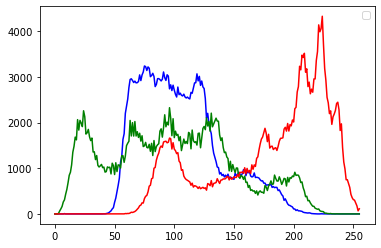

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys

src = cv2.imread('Ch_3_Basic_img_proc/fig/lenna.bmp', 1)

hist_b = cv2.calcHist([src], [0], None, [256], [0, 256,])
hist_g = cv2.calcHist([src], [1], None, [256], [0, 256,])
hist_r = cv2.calcHist([src], [2], None, [256], [0, 256,])


cv2.imshow('src', src)
# plt.plot(hist)
plt.plot(hist_b, c='b')
plt.plot(hist_g, c='g')
plt.plot(hist_r, c='r')
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys

def getGrayHistogram(hist):
    imgHist = np.full((200, 256), 255, np.uint8)
    
    histMax = np.max(hist)
    
    for x in range(256):
        pt1 = (x, 200)
        pt2 = (x, 200 - int(hist[x, 0]*200 / histMax))
        cv2.line(imgHist, pt1, pt2, 0)
        
    return imgHist

src = cv2.imread('Ch_3_Basic_img_proc/fig/lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

hist = cv2.calcHist([src], [0], None, [256], [0, 256,])
hist_img = getGrayHistogram(hist)

cv2.imshow('src', src)
cv2.imshow('hist_img', hist_img)
cv2.waitKey()

cv2.destroyAllWindows()